<h3>Research Question:</h3><p></p>

<p style="font-size: 24px">Data Cleaning</p>

In [154]:
import pandas as pd
import duckdb as db
import seaborn as sns
import matplotlib.pyplot as plt

#clean database on felonies and convert values to int
felonies_nyc= pd.read_csv("felony.csv")
for column in felonies_nyc.columns[1:]:
    if felonies_nyc[column].dtype != int:
        felonies_nyc[column] = felonies_nyc[column].str.replace(",", "").astype(int)

#clean database on non-felonies and convert values to int
nfelonies_nyc= pd.read_csv("non-felony.csv")
for column in nfelonies_nyc.columns[1:]:
    if nfelonies_nyc[column].dtype != int:
        nfelonies_nyc[column] = nfelonies_nyc[column].astype(int)

# Remove the last row from both, which contains individual daTa totals
felonies_nyc = felonies_nyc.iloc[:-1]
nfelonies_nyc = nfelonies_nyc.iloc[:-1]
merged_df = pd.concat([felonies_nyc, nfelonies_nyc], ignore_index=True)

#get totals starting from second column   (PRINCE: i removed the offense colum from new total because it was causing a sum error )
new_totals = merged_df.iloc[:, 1:].sum()

# Set the name for the last row in OFFENSE to Total Crime
merged_df.at[len(merged_df) - 1, 'OFFENSE'] = "Total Crime"

#add new totals to that row (PRINCE: i used .iloc instead of .at)
merged_df.iloc[len(merged_df) - 1, 1:] = new_totals.values 

print(merged_df)


                                      OFFENSE    2000    2001    2002    2003  \
0             MURDER & NON-NEGL. MANSLAUGHTER     673     649     587     597   
1                                        RAPE    2068    1981    2144    2070   
2                                     ROBBERY   32562   28202   27229   25989   
3                              FELONY ASSAULT   25924   23453   21147   19139   
4                                    BURGLARY   38352   32763   31275   29110   
5                               GRAND LARCENY   49631   46329   45771   46751   
6              GRAND LARCENY OF MOTOR VEHICLE   35442   29531   26656   23413   
7        FELONY POSSESSION OF STOLEN PROPERTY    2194    2114    1976    1545   
8          FORGERY/THEFT_FRAUD/IDENTITY THEFT    5714    5594    5859    8112   
9                                       ARSON    3189    2681    1902    1492   
10                      FELONY SEX CRIMES (3)    1839    1831    1513    1295   
11                 FELONY DA

                           OFFENSE   2000   2001   2002   2003   2004   2005  \
0  MURDER & NON-NEGL. MANSLAUGHTER    673    649    587    597    570    539   
1                             RAPE   2068   1981   2144   2070   1905   1858   
2                          ROBBERY  32562  28202  27229  25989  24373  24722   
3                   FELONY ASSAULT  25924  23453  21147  19139  18622  17750   
4                         BURGLARY  38352  32763  31275  29110  26976  24117   

    2006   2007   2008  ...   2013   2014   2015   2016   2017   2018   2019  \
0    596    496    523  ...    335    333    352    335    292    295    319   
1   1525   1351   1299  ...   1378   1352   1438   1438   1449   1794   1755   
2  23739  21809  22401  ...  19128  16539  16931  15500  13956  12913  13371   
3  17309  17493  16284  ...  20297  20207  20270  20847  20052  20208  20698   
4  23143  21762  20725  ...  17429  16765  15125  12990  12083  11687  10783   

    2020   2021     2022  
0    468   

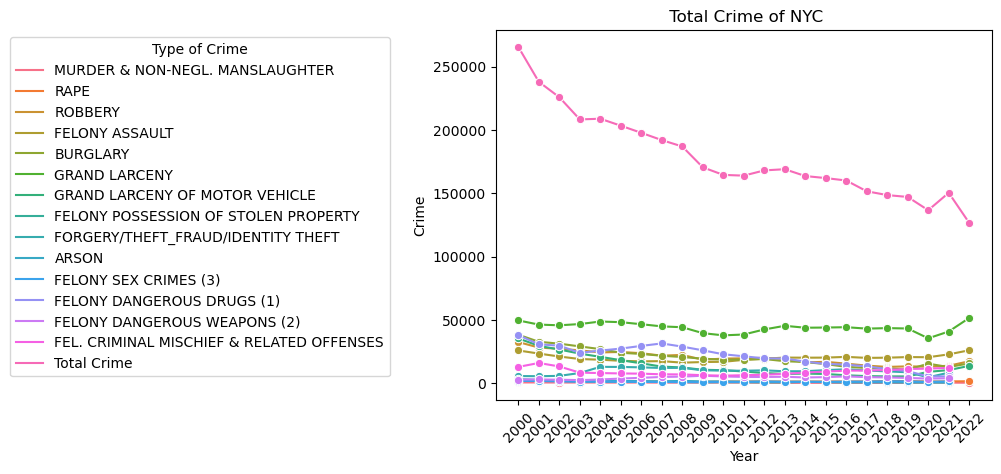

In [155]:
#VISUALIZING VIOLENT CRIME AS A LINE GRAPH
nyc_crime= merged_df
print(nyc_crime.head())

#Melting the DataFrame
melted_demographic = nyc_crime.melt(id_vars=['OFFENSE'], var_name='Year', value_name='Count')

#visualizong with a line plot
sns.lineplot(data=melted_demographic, x='Year', y='Count', hue='OFFENSE', marker='o')
plt.title(" Total Crime of NYC")
plt.xlabel("Year")
plt.ylabel("Crime")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
# Adjust the legend to be outside the plot area
plt.legend(title="Type of Crime", bbox_to_anchor=(-0.20, 1), loc='upper right')


  Geographic Area (in dollars)   1990   2000    2010    2013    2014    2015  \
0                        Bronx  15576  19965   29910   30647   31556   32778   
1             Brooklyn (Kings)  18333  25136   35811   39586   41399   43915   
2                    Manhattan  50225  88640  121550  145231  152690  155779   
3                       Queens  22397  28516   37259   39789   40997   43216   
4     Staten Island (Richmond)  23519  34676   43438   46219   48123   50894   

     2016    2017  
0   33310   35564  
1   45629   48758  
2  164056  175960  
3   44031   46829  
4   51836   54908  


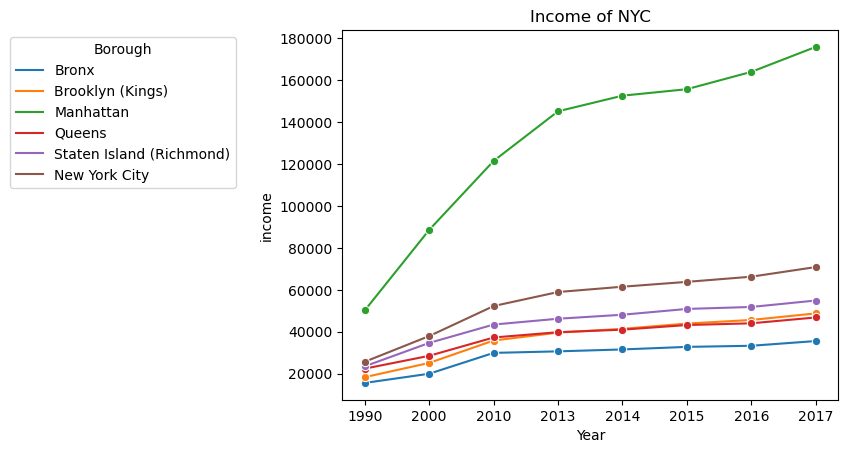

In [160]:
#VISUALIZING INCOME AS A LINE GRAPH

#Loading csv file
nyc_income= pd.read_csv('income.csv', encoding='latin1')
print(nyc_income.head())

#Melting the DataFrame
melted_demographic = nyc_income.melt(id_vars=['Geographic Area (in dollars)'], var_name='Year', value_name='Count')

#visualizong with a line plot
sns.lineplot(data=melted_demographic, x='Year', y='Count', hue='Geographic Area (in dollars)', marker='o')
plt.title("Income of NYC")
plt.xlabel("Year")
plt.ylabel("income")
plt.legend(title="Borough",bbox_to_anchor=(-0.20, 1), loc='upper right')

   Year      White  NonHispanic      Black      Asian      Mixed   Hispanic
0  1990  3827088.0    3163125.0  2102512.0   512719.0   880245.0  1783511.0
1  2000  3576385.0    2801267.0  2129762.0   792477.0  1509654.0  2160554.0
2  2010  3597341.0    2722904.0  2088510.0  1043535.0  1445747.0  2336076.0
3  2020  3000945.0    2719856.0  1943645.0  1385144.0  2474456.0  2490350.0
  Geographic Area (in dollars)  Year  Count
0                        Bronx  1990  15576
1             Brooklyn (Kings)  1990  18333
2                    Manhattan  1990  50225
3                       Queens  1990  22397
4     Staten Island (Richmond)  1990  23519


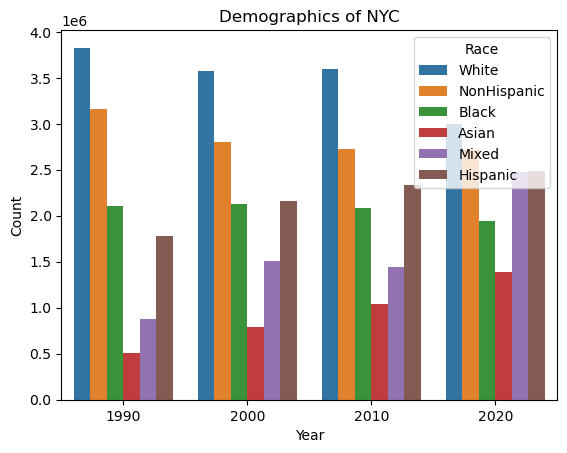

In [157]:
#reading in csv file
nyc_demographics= pd.read_csv('NYC_demographics.csv', encoding='latin1')

#changing year column values to int type so that they can be read as ints in further cleaning
nyc_demographics['Year']= nyc_demographics['Year'].astype(int)
#renaming column to prevent syntax issues 
nyc_demographics.rename(columns={'Non-Hispanic': 'NonHispanic'}, inplace=True)

#checking and changing column values that are originally objects and removing commas to facilitate float conversion later
for col in nyc_demographics:
    if nyc_demographics[col].dtype == 'object':
        nyc_demographics[col]= nyc_demographics[col].str.replace(",", "")

#changing the column value type from object to float
nyc_demographics[['White', 'NonHispanic', 'Black', 'Asian', 'Mixed',
                   'Hispanic',]]= nyc_demographics[['White', 'NonHispanic',
                    'Black', 'Asian', 'Mixed', 'Hispanic',]].astype(float)

#creating a clean dataframe that only has relevant columns
nyc_demographics_clean= db.sql("""
SELECT Year, White, NonHispanic, Black, Asian, Mixed, Hispanic
FROM nyc_demographics
WHERE Year > 1980""").df()
#confirming that new dataframe has correct information
print(nyc_demographics_clean)

#melting the dataframe and adding a column titled "Race" so that I can make a barplot that is colored by race
melted_nyc_demographic= pd.melt(nyc_demographics_clean, id_vars= 'Year', var_name= 'Race', value_name='Count')
print(melted_demographic.head())

#visualizing data with a barplot
sns.barplot(data= melted_nyc_demographic, x= 'Year', y='Count', hue='Race')
plt.title("Demographics of NYC")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Race", loc='upper right');

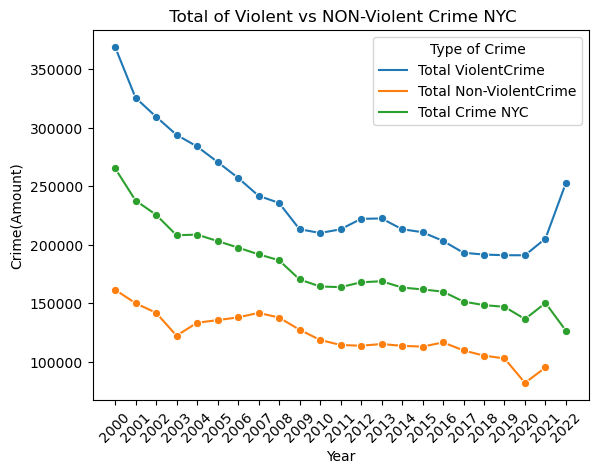

In [158]:
# Clean database on felonies and convert values to int
felonies_nyc = pd.read_csv("felony.csv")
for column in felonies_nyc.columns[1:]:
    if felonies_nyc[column].dtype != int:
        felonies_nyc[column] = felonies_nyc[column].str.replace(",", "").astype(int)

# Clean database on non-felonies and convert values to int
nfelonies_nyc = pd.read_csv("non-felony.csv")
for column in nfelonies_nyc.columns[1:]:
    if nfelonies_nyc[column].dtype != int:
        nfelonies_nyc[column] = nfelonies_nyc[column].astype(int)

# Calculate totals for felonies
felonies_total = felonies_nyc.iloc[:, 1:].sum()
felonies_total['OFFENSE'] = "Total ViolentCrime"
felonies_nyc = pd.concat([felonies_nyc, pd.DataFrame([felonies_total])])

# Calculate totals for non-felonies
nfelonies_total = nfelonies_nyc.iloc[:, 1:].sum()
nfelonies_total['OFFENSE'] = "Total Non-ViolentCrime"
nfelonies_nyc = pd.concat([nfelonies_nyc, pd.DataFrame([nfelonies_total])])

#changing the label for Crime
merged_df['OFFENSE'] = "Total Crime NYC"

# Extract the totals for felonies and non-felonies
total_nyc_crime = merged_df.iloc[-1:]
total_felonies = felonies_nyc.iloc[-1:]
total_non_felonies = nfelonies_nyc.iloc[-1:]

# Combine the totals into a single DataFrame
combined_totals = pd.concat([total_felonies, total_non_felonies, total_nyc_crime], ignore_index=True)

# Melt the combined totals DataFrame
melted_totals = combined_totals.melt(id_vars=['OFFENSE'], var_name='Year', value_name='Count')

#visualizong with a line plot
sns.lineplot(data=melted_totals, x='Year', y='Count', hue='OFFENSE', marker='o')
plt.title(" Total of Violent vs NON-Violent Crime NYC")
plt.xlabel("Year")
plt.ylabel("Crime(Amount)")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
# Adjust the legend to be outside the plot area
plt.legend(title="Type of Crime", loc='upper right')



                Income  Total Crimes
Income        1.000000     -0.243272
Total Crimes -0.243272      1.000000


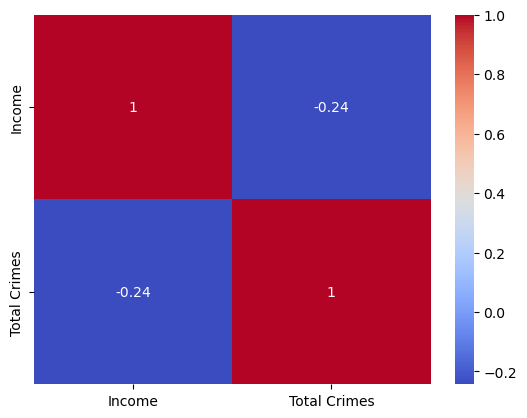

In [159]:
#correlation matrix between household income and crime

# Load the datasets
crime_data = merged_df
household_income = melted_demographic

#restructuring crime data set so it can match the year and total structure of income data set
restructured_crime = {
    'OFFENSE': ['Total Crime OF NYC'] * 15,
    '2000': [673, 2068, 32562, 25924, 38352, 49631, 35442, 2194, 5714, 3189, 1839, 38088, 2958, 12934, 265513],
    '2001': [649, 1981, 28202, 23453, 32763, 46329, 29531, 2114, 5594, 2681, 1831, 30743, 3030, 16026, 237986],
    '2002': [587, 2144, 27229, 21147, 31275, 45771, 26656, 1976, 5859, 1902, 1513, 29692, 2804, 13291, 225802],
    '2003': [597, 2070, 25989, 19139, 29110, 46751, 23413, 1545, 8112, 1492, 1295, 24076, 2511, 8400, 208286],
    '2004': [570, 1905, 24373, 18622, 26976, 48763, 20884, 1358, 12984, 1789, 1263, 25824, 2987, 8074, 208826],
    '2005': [539, 1858, 24722, 17750, 24117, 48243, 18246, 1250, 12896, 1831, 1162, 27391, 3748, 7776, 203329],
    '2006': [596, 1525, 23739, 17309, 23143, 46625, 15745, 1175, 12579, 1679, 1096, 29516, 4315, 7605, 197710],
    '2007': [496, 1351, 21809, 17493, 21762, 44924, 13174, 1073, 12075, 1527, 1031, 31459, 5004, 7090, 191967],
    '2008': [523, 1299, 22401, 16284, 20725, 44242, 12482, 1016, 12216, 1896, 909, 28936, 5263, 7003, 186914],
    '2009': [523, 1299, 22401, 16284, 20725, 44242, 12482, 1016, 12216, 1896, 909, 28936, 5263, 7003, 186914],
    '2010': [596, 1525, 23739, 17309, 23143, 46625, 15745, 1175, 12579, 1679, 1096, 29516, 4315, 7605, 197710],
    '2011': [496, 1351, 21809, 17493, 21762, 44924, 13174, 1073, 12075, 1527, 1031, 31459, 5004, 7090, 191967],
    '2012': [335, 1378, 19128, 20297, 17429, 45368, 7400, 689, 9493, 1187, 1073, 19571, 5155, 7468, 168985],
    '2013': [335, 1378, 19128, 20297, 17429, 45368, 7400, 689, 9493, 1187, 1073, 19571, 5155, 7468, 168985],
    '2014': [333, 1352, 16539, 20207, 16765, 43862, 7664, 1090, 9520, 1205, 1135, 17113, 4605, 8466, 163591],
    '2015': [352, 1438, 16931, 20270, 15125, 44005, 7332, 904, 10400, 1026, 1152, 15279, 4848, 9253, 161973],
    '2016': [335, 1438, 15500, 20847, 12990, 44279, 6327, 769, 11079, 802, 1336, 14712, 5465, 9966, 160062],
    '2017': [292, 1449, 13956, 20052, 12083, 43150, 5676, 1019, 10063, 680, 1367, 13348, 4843, 10073, 151565],
    '2018': [295, 1794, 12913, 20208, 11687, 43558, 5428, 951, 9413, 741, 1615, 11236, 4639, 10427, 148550],
    '2019': [319, 1755, 13371, 20698, 10783, 43250, 5430, 733, 8684, 711, 1562, 9587, 4219, 11302, 147090],
    '2020': [468, 1427, 13106, 20572, 15478, 35505, 9037, 699, 4746, 832, 1143, 5372, 3677, 11569, 136608],
    '2021': [488, 1491, 13831, 22835, 12811, 40870, 10415, 712, 8389, 632, 1503, 5485, 3990, 12179, 150376],

}

# Convert the dictionary to a DataFrame
crime_df = pd.DataFrame(restructured_crime)

# Compute the total crimes for each year
total_crimes_per_year = crime_df.sum(axis=0).drop('OFFENSE')

# Convert the Series to a DataFrame for merging
total_crimes_df = total_crimes_per_year.reset_index()
total_crimes_df.columns = ['Year', 'Total Crimes']

# Merge the datasets
merged_data = pd.merge(household_income, total_crimes_df, on='Year', how='left')
#renaming count as income
merged_data = merged_data.rename(columns={"Count": "Income"})


#calculating correlation matrix
correlation_matrix = merged_data[['Income', 'Total Crimes']].corr()


print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


<p style="font-size: 20px;">Data Limitations</p>

<p>Some limitations we may approach when dealing with our data is the lack of dates (in years) for each dataset. For instance, we have crime data that spans from the year 2000 to 2020 and there are datapoints for every  year in between, meanwhile for demographic data we have usable data from the year 1990 to 2020, however there are only data points for each decade between that range. These limitations should not grossly affect any conclusions that we may come to make, but can possibly affect the intensity of our findings and the fit of our logistic regression model that we plan to produce in the future.</p>